# SEECS Parking Simulation Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Loading Data from file

In [2]:
# read text file into pandas DataFrame
df = pd.read_csv("Non Optimal.txt", sep="\t")
df_op = pd.read_csv("Optimal.txt", sep="\t")


## Data Preparation and Cleaning

- Loading the file using pandas

- Fix any missing or incorrect values

In [3]:
cleaned_df = df.copy()
cleaned_df.drop('Car ID', inplace=True, axis=1)
cleaned_df.drop('Unnamed: 26', inplace=True, axis=1)

cleaned_df.drop(cleaned_df[cleaned_df['TBill'] == 0].index, inplace = True)


cleaned_df_op = df_op.copy()
cleaned_df_op.drop('Car ID', inplace=True, axis=1)
cleaned_df_op.drop('Unnamed: 26', inplace=True, axis=1)

cleaned_df_op.drop(cleaned_df_op[cleaned_df_op['TBill'] == 0].index, inplace = True)

## Statistical Analysis

In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = cleaned_df.select_dtypes(include=numerics)

numeric_df_op = cleaned_df_op.select_dtypes(include=numerics)


numeric_df
numeric_df_op


,VType,Day,ReqT,EntHr,EntMin,ExitHr,ExitMin,TDelay,IdleT,TBill,...,nFill,Tries,DFS,IdleVeh,tFree,z1Free,z2Free,z3Free,z4Free,dReq
0,3,1,1547,8,34,8,60,1547,2048,29,...,4,1,365,7,85,10,45,8,22,0
4,2,1,2759,8,29,9,15,2759,1763,80,...,3,1,365,10,88,12,46,8,22,7
6,2,1,368,9,21,9,27,368,4875,11,...,11,1,365,21,64,0,34,8,22,7
8,3,1,2800,8,45,9,31,2800,2688,53,...,5,1,365,12,80,8,42,8,22,7
14,5,1,1096,9,20,9,38,1096,4774,14,...,1,1,386,21,64,0,34,8,22,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1475,3,1,10928,16,35,19,37,10928,30907,205,...,10,2,365,10,37,2,10,3,22,57
1476,5,1,9432,17,2,19,39,9432,32527,118,...,9,1,386,9,47,7,15,3,22,57
1477,5,1,10966,16,27,19,30,10966,30437,137,...,11,1,386,15,38,2,12,2,22,57
1478,2,1,4749,18,9,19,28,4749,36532,139,...,7,1,365,4,60,5,29,5,21,57



## Plotting histogram for idle vehicle during one day

In [5]:
# Sorting the data
numeric_df = numeric_df.sort_values(['EntHr', 'EntMin'], ascending=[True, True])

numeric_df_op = numeric_df_op.sort_values(['EntHr', 'EntMin'], ascending=[True, True])

In [6]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_idleVehicles = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_idleVehicles[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['IdleVeh'].sum()
    
sum_of_idleVehicles_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_idleVehicles_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['IdleVeh'].sum()
    
print(sum_of_idleVehicles)
print(sum_of_idleVehicles_op)

[1839, 4361, 4053, 2271, 1681, 4053, 9466, 11607, 11637, 7238, 1944, 187]
[688, 1651, 1042, 685, 748, 2274, 3367, 2667, 1318, 662, 68, 27]


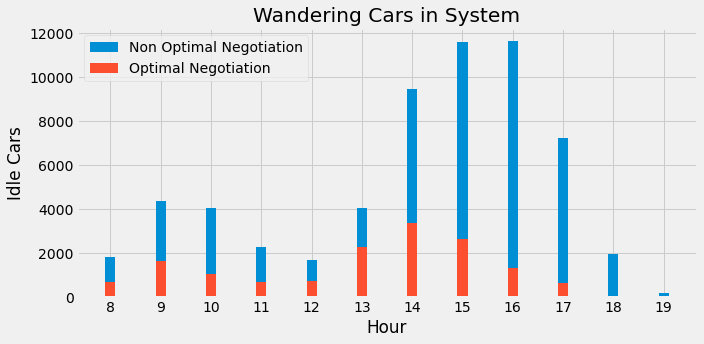

In [7]:
# plotting histogram for idle vehicle count per each hour
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))
plt.bar(hours, sum_of_idleVehicles ,width=0.2, label='Non Optimal Negotiation')
plt.bar(hours, sum_of_idleVehicles_op, width=0.2, label='Optimal Negotiation')


plt.legend()
plt.xticks(ticks=hours)
plt.xlabel("Hour")
plt.ylabel("Idle Cars")
plt.title("Wandering Cars in System")
plt.tight_layout()
plt.show()

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[13320, 14320, 10032, 7116, 7501, 8774, 9435, 7135, 6527, 5131, 2565, 669]
[7338, 7122, 5070, 4452, 4447, 6839, 5233, 4105, 3541, 2641, 894, 560]


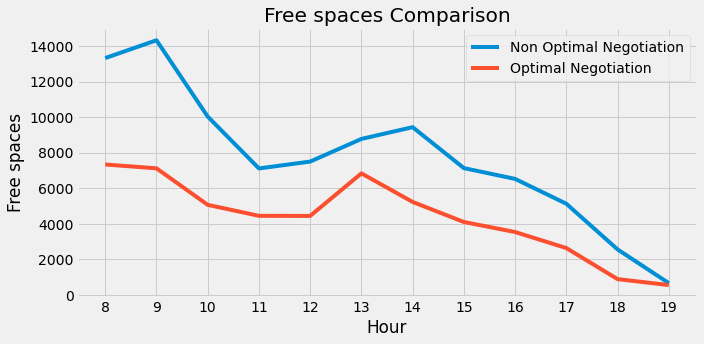

In [8]:
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_free = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_free[hour] = numeric_df[numeric_df['EntHr'] == hours[hour]]['tFree'].sum()
    
    
hours = sorted(list(df['EntHr'].unique()))  # separating unique hours
sum_of_free_op = list(np.zeros(len(hours)))  # creating an empty array for storing sum of idle vehicles in each hour

for hour in range(len(hours)):
    sum_of_free_op[hour] = numeric_df_op[numeric_df_op['EntHr'] == hours[hour]]['tFree'].sum()
    
print(hours)
print(sum_of_free)
print(sum_of_free_op)

# plotting histogram for free spots per each hour
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,5))

plt.plot(hours, sum_of_free, label='Non Optimal Negotiation')
plt.plot(hours, sum_of_free_op, label='Optimal Negotiation')


plt.legend()
plt.xticks(ticks=hours)
plt.xlabel("Hour")
plt.ylabel("Free spaces")
plt.title("Free spaces Comparison")
plt.tight_layout()
plt.show() 

In [ ]:
# Normalising the counts of free spaces

In [12]:
a = np.array(sum_of_free)
np.round((a - np.min(a)) / (np.max(a) - np.min(a)) * 100)

array([ 93., 100.,  69.,  47.,  50.,  59.,  64.,  47.,  43.,  33.,  14.,
         0.])

In [14]:
b = np.array(sum_of_free_op)
np.round((b - np.min(b)) / (np.max(b) - np.min(b)) * 100)

array([100.,  97.,  67.,  57.,  57.,  93.,  69.,  52.,  44.,  31.,   5.,
         0.])